In [1]:
from autogluon.tabular import TabularDataset, TabularPredictor
import numpy as np
import math

c:\Users\kwitv\Documents\MARC\SOCprediction\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
train_data = TabularDataset(f'Data/phil_rangedata_train.csv')
train_data.head()

,Initial SOC,Final SOC,Altitude Difference,Average Speed,Final Accumulated Distance
0,47.058838,25.490204,-99.106378,30.352603,54604.341629
1,82.745125,78.431396,-15.233335,28.810930,17257.400153
2,85.882378,81.568657,101.392726,27.704224,16593.307234
3,83.137283,78.823555,-0.943887,21.467391,12855.031758
4,39.607857,31.764715,-72.547066,30.345322,18176.565677


In [3]:
label = 'Final SOC'
train_data[label].describe()

count    1828.000000
mean       64.092254
std        24.591743
min        11.764709
25%        42.352955
50%        69.803947
75%        85.098068
max       100.000031
Name: Final SOC, dtype: float64

In [6]:
predictor = TabularPredictor(label=label,eval_metric='root_mean_squared_error').fit(train_data, presets='best_quality', verbosity=1) 

No path specified. Models will be saved in: "AutogluonModels\ag-20230328_012716\"
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])


In [7]:
test_data = TabularDataset(f'Data/phil_rangedata_test.csv')

y_pred = predictor.predict(test_data.drop(columns=[label]))
y_pred.head()

0    78.841988
1    72.420044
2    54.916847
3    57.529736
4    63.811779
Name: Final SOC, dtype: float32

In [8]:
predictor.evaluate(test_data, silent=True)

c:\Users\kwitv\Documents\MARC\SOCprediction\venv\lib\site-packages\autogluon\tabular\predictor\predictor.py:1420: FutureWarning: Calling `predictor.predict_proba` when problem_type=regression will raise an AssertionError starting in AutoGluon v0.8. Please call `predictor.predict` instead.
  warnings.warn(


{'root_mean_squared_error': -6.785916541148039,
 'mean_squared_error': -46.04866330342656,
 'mean_absolute_error': -5.423471281700169,
 'r2': 0.9146016223951139,
 'pearsonr': 0.9602915747446821,
 'median_absolute_error': -4.693008422851619}

In [9]:
predictor.leaderboard(test_data, silent=True)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,NeuralNetTorch_BAG_L1,-6.633095,-2.217296,0.048870,0.053365,18.118668,0.048870,0.053365,18.118668,1,True,10
1,WeightedEnsemble_L2,-6.785917,-1.993951,0.675742,0.537326,63.496067,0.003988,0.000998,0.345150,2,True,12
2,NeuralNetFastAI_BAG_L1,-6.826821,-2.113018,0.071287,0.079000,10.059960,0.071287,0.079000,10.059960,1,True,8
3,NeuralNetFastAI_BAG_L2,-7.108270,-2.110752,0.978231,1.082480,75.391881,0.073309,0.099242,9.964438,2,True,18
4,NeuralNetTorch_BAG_L2,-7.432045,-2.239024,0.956784,1.047096,79.982130,0.051863,0.063858,14.554687,2,True,20
5,WeightedEnsemble_L3,-7.518707,-2.069313,1.264997,1.369769,114.467425,0.003497,0.000000,0.216064,3,True,22
6,LightGBM_BAG_L2,-7.711889,-2.152192,0.941825,1.001195,67.086441,0.036904,0.017957,1.658997,2,True,14
7,XGBoost_BAG_L2,-7.847302,-2.160436,1.000173,1.042082,68.216481,0.095251,0.058844,2.789038,2,True,19
8,LightGBMLarge_BAG_L2,-7.970475,-2.249628,1.011732,1.032148,70.008206,0.106810,0.048910,4.580763,2,True,21
9,RandomForestMSE_BAG_L2,-8.152624,-2.143354,0.985224,1.115918,67.127719,0.080302,0.132680,1.700276,2,True,15


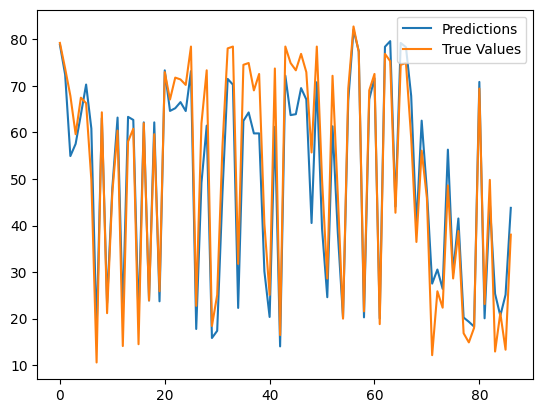

In [10]:
#plots the predicted vs actual values of the top performing model using matplotlib
import matplotlib.pyplot as plt
plt.plot(y_pred, label="Predictions")
plt.plot(test_data[label], label="True Values")
plt.legend()
plt.show()

In [11]:
mse_test = np.mean(((y_pred - test_data[label])**2))
rmse_test = math.sqrt(mse_test)
print("test data rmse", rmse_test)

test data rmse 6.785916541148039
